<a href="https://colab.research.google.com/github/alibigdelou/Blog-App-with-Flask/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LR=0.001 → Final params: w=0.045, b=0.335
LR=0.01 → Final params: w=2.337, b=1.918
LR=0.1 → Final params: w=3.000, b=2.019


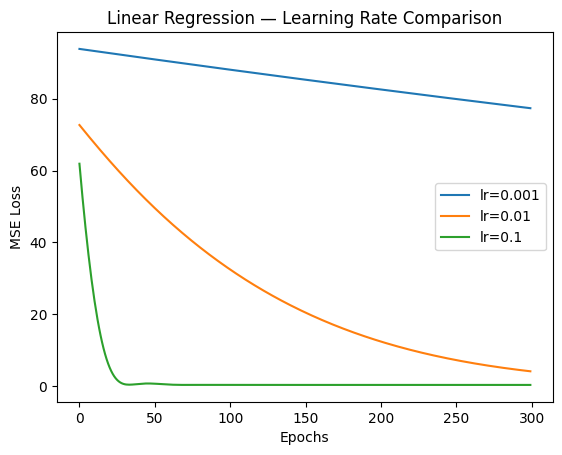

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Generate synthetic linear data
torch.manual_seed(0)
x = torch.linspace(-5, 5, 100).unsqueeze(1)
y_true = 3 * x + 2 + 0.5 * torch.randn_like(x)  # add small noise

# 2. Define simple linear regression model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 3. Compare learning rates
learning_rates = [0.001, 0.01, 0.1]
losses_dict = {}

for lr in learning_rates:
    model = LinearModel()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    losses = []
    for epoch in range(300):
        y_pred = model(x)
        loss = loss_fn(y_pred, y_true)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    losses_dict[lr] = losses

    print(f"LR={lr} → Final params: w={model.linear.weight.item():.3f}, b={model.linear.bias.item():.3f}")

# 4. Plot loss curves
plt.figure()
for lr in learning_rates:
    plt.plot(losses_dict[lr], label=f"lr={lr}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Linear Regression — Learning Rate Comparison")
plt.legend()
plt.show()


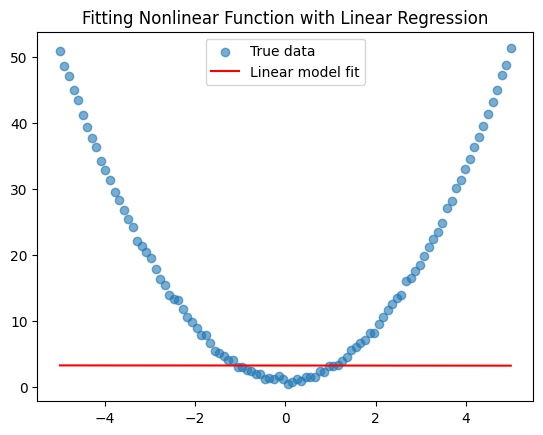

In [2]:
# Nonlinear data
y_nonlinear = 2 * x**2 + 1 + 0.3 * torch.randn_like(x)

model = LinearModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(300):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_nonlinear)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot
plt.figure()
plt.scatter(x, y_nonlinear, label="True data", alpha=0.6)
plt.plot(x, model(x).detach(), color='red', label="Linear model fit")
plt.legend()
plt.title("Fitting Nonlinear Function with Linear Regression")
plt.show()
